## **Multiple Linear Regression**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Load CSV file 
df = pd.read_csv('au-bank.csv')

# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Converting 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [ ]:
# Feature Engineering
df['high_low_spread'] = df['high'] - df['low']
df['price_change'] = df['close'] - df['open']
df['prev_close_diff'] = df['close'] - df['prev_close']
df['ltp_diff'] = df['ltp'] - df['prev_close']
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Drop missing values
df.dropna(inplace=True)

In [ ]:
# Defining features and target
features = ['open', 'high', 'low', 'prev_close', 'ltp', 'vwap', '52w_high', '52w_low',
            'volume', 'value', 'no_of_trades', 'high_low_spread', 'price_change',
            'prev_close_diff', 'ltp_diff', 'day_of_week', 'month']

X = df[features]
y = df['close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make Predictions
y_pred = lr.predict(X_test)

In [45]:
# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 1.0
MAE: 3.251669127960682e-11
MSE: 3.532094117161631e-21
RMSE: 5.94314236508064e-11


In [46]:
# VIF Calculation
X_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif)



Variance Inflation Factor (VIF):
            Feature           VIF
0             const  5.933676e+01
1              open           inf
2              high           inf
3               low           inf
4        prev_close           inf
5               ltp           inf
6              vwap  5.352249e+03
7          52w_high  1.290528e+00
8           52w_low  1.509440e+00
9            volume  2.545241e+01
10            value  2.546158e+01
11     no_of_trades  4.128970e+00
12  high_low_spread           inf
13     price_change  1.801440e+15
14  prev_close_diff  4.503600e+15
15         ltp_diff           inf
16      day_of_week  1.015786e+00
17            month  1.055091e+00


c:\Users\jainu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [47]:
# Reduced feature set to minimize multicollinearity
selected_features = [
    'open', 'high', 'low', 'vwap', '52w_high', '52w_low', 'volume', 'value', 'no_of_trades', 'day_of_week', 'month'
]

X = df[selected_features]
y = df['close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# VIF
X_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\nVIF after removing multicollinear features:")
print(vif)


R² Score: 0.9990732445298939
MAE: 5.300924355445608
MSE: 67.55125735523428
RMSE: 8.218957193904485

VIF after removing multicollinear features:
         Feature          VIF
0          const    59.172733
1           open   557.058710
2           high  1787.761329
3            low  1406.767403
4           vwap  3525.999614
5       52w_high     1.287183
6        52w_low     1.498978
7         volume    24.934970
8          value    24.806280
9   no_of_trades     4.123264
10   day_of_week     1.015607
11         month     1.054296


In [37]:
selected_features = [
    'open', '52w_high', '52w_low',
    'volume', 'no_of_trades', 'day_of_week', 'month'
]

X = df[selected_features]
y = df['close']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# VIF Check
X_const = sm.add_constant(X_train)
vif_df = pd.DataFrame()
vif_df["Feature"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\nFinal VIF Table:")
print(vif_df)


R² Score: 0.9928982741635771
MAE: 14.937545355400209
MSE: 517.6451880964439
RMSE: 22.75181724822094

Final VIF Table:
        Feature        VIF
0         const  44.558590
1          open   1.577302
2      52w_high   1.222942
3       52w_low   1.390500
4        volume   3.698643
5  no_of_trades   3.764400
6   day_of_week   1.011748
7         month   1.047044


📊 Model Performance:
R² Score: 0.9928982741635771
MAE: 14.937545355400209
MSE: 517.6451880964439
RMSE: 22.75181724822094

📈 Final VIF Table:
        Feature        VIF
0         const  44.558590
1          open   1.577302
2      52w_high   1.222942
3       52w_low   1.390500
4        volume   3.698643
5  no_of_trades   3.764400
6   day_of_week   1.011748
7         month   1.047044


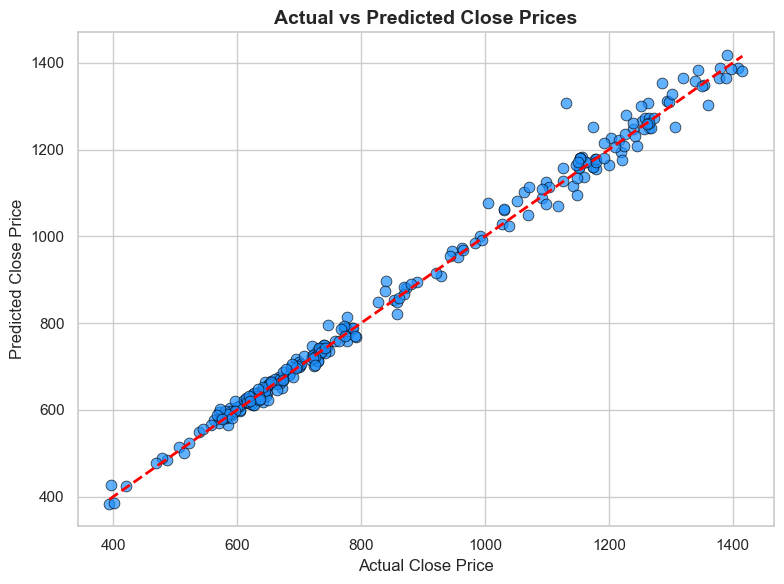

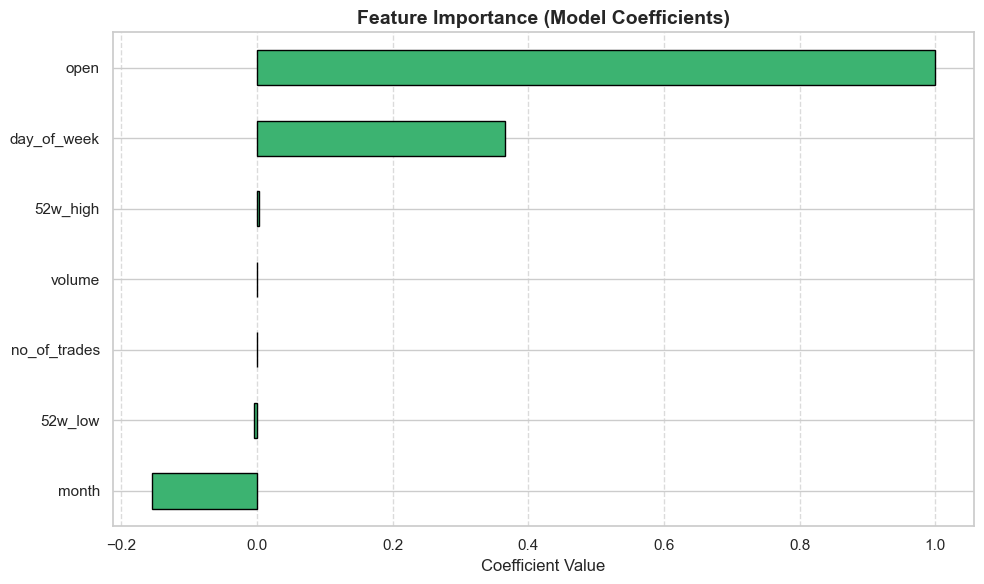

In [ ]:
# Final selected features
features = ['open', '52w_high', '52w_low', 'volume', 'no_of_trades', 'day_of_week', 'month']
X = df[features]
y = df['close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation
print("📊 Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# VIF Calculation
X_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\n📈 Final VIF Table:")
print(vif)


# Plot 1: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, s=60, color='dodgerblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Close Price", fontsize=12)
plt.ylabel("Predicted Close Price", fontsize=12)
plt.title("Actual vs Predicted Close Prices", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot 2: Feature Importance (Coefficients)
plt.figure(figsize=(10, 6))
importance = pd.Series(lr.coef_, index=X.columns)
importance.sort_values().plot(kind='barh', color='mediumseagreen', edgecolor='black')
plt.title("Feature Importance (Model Coefficients)", fontsize=14, fontweight='bold')
plt.xlabel("Coefficient Value", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
